In [1]:
!sudo update-alternatives --config python3
!python3 -m pip install --upgrade pip
!python3 -m pip install "gymnasium[atari]" ale-py autorom
!which python3
!python3 --version
!wget https://bootstrap.pypa.io/get-pip.py
!python3 get-pip.py
!python3 -m pip --version
!python3 -m pip install "gymnasium[atari]==0.29.1"
!python3 -m pip install "ale-py==0.8.1"
!python3 -m pip install autorom
!python3 -m AutoROM --accept-license
!python3 -m pip install "gymnasium[atari]" ale-py AutoROM AutoROM.accept-rom-license

!python3 -m AutoROM.accept_rom_license --accept-license
import gymnasium as gym
import ale_py

gym.register_envs(ale_py)
print("Atari envs registered!")

gym.pprint_registry()

There are 2 choices for the alternative python3 (providing /usr/bin/python3).

  Selection    Path                 Priority   Status
------------------------------------------------------------
* 0            /usr/bin/python3.12   2         auto mode
  1            /usr/bin/python3.10   1         manual mode
  2            /usr/bin/python3.12   2         manual mode

Press <enter> to keep the current choice[*], or type selection number: 1
update-alternatives: using /usr/bin/python3.10 to provide /usr/bin/python3 (python3) in manual mode
/usr/bin/python3: No module named pip
/usr/bin/python3: No module named pip
/usr/bin/python3
Python 3.10.12
--2025-12-04 00:26:29--  https://bootstrap.pypa.io/get-pip.py
Resolving bootstrap.pypa.io (bootstrap.pypa.io)... 151.101.0.175, 151.101.64.175, 151.101.128.175, ...
Connecting to bootstrap.pypa.io (bootstrap.pypa.io)|151.101.0.175|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2182415 (2.1M) [text/x-python]
Saving to: ‘g

In [2]:
!pip install "gymnasium[atari]==0.29.1"
!pip install "ale-py==0.8.1"
!pip install autorom


Using random baseline on PongNoFrameskip-v4
PONG | Episode   1 | Random Reward = -21.0
PONG | Episode   2 | Random Reward = -21.0
PONG | Episode   3 | Random Reward = -21.0
PONG | Episode   4 | Random Reward = -21.0
PONG | Episode   5 | Random Reward = -21.0
PONG | Episode   6 | Random Reward = -21.0
PONG | Episode   7 | Random Reward = -20.0
PONG | Episode   8 | Random Reward = -21.0
PONG | Episode   9 | Random Reward = -20.0
PONG | Episode  10 | Random Reward = -21.0
PONG | Episode  11 | Random Reward = -21.0
PONG | Episode  12 | Random Reward = -21.0
PONG | Episode  13 | Random Reward = -21.0
PONG | Episode  14 | Random Reward = -20.0
PONG | Episode  15 | Random Reward = -20.0
PONG | Episode  16 | Random Reward = -21.0
PONG | Episode  17 | Random Reward = -21.0
PONG | Episode  18 | Random Reward = -21.0
PONG | Episode  19 | Random Reward = -21.0
PONG | Episode  20 | Random Reward = -20.0
PONG | Episode  21 | Random Reward = -18.0
PONG | Episode  22 | Random Reward = -20.0
PONG | Epi

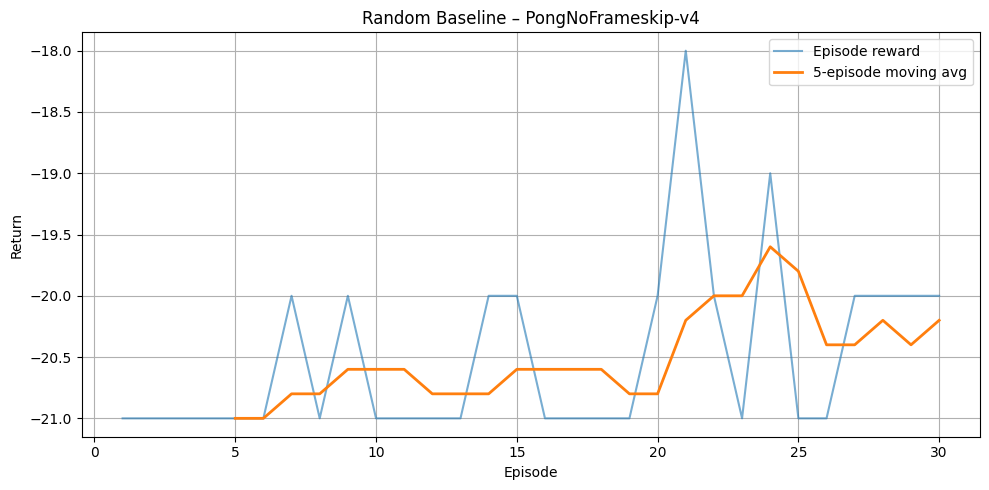

Saved plot to pong_random_rewards.png


Pong random episode reward: -21.0
Saved video to pong_random.mp4


In [7]:
import gymnasium as gym
import ale_py
import numpy as np
import matplotlib.pyplot as plt
import imageio

# Register ALE environments
gym.register_envs(ale_py)

print("Using random baseline on PongNoFrameskip-v4")

def run_random_pong(episodes=30, max_steps=10000):
    env = gym.make("PongNoFrameskip-v4", repeat_action_probability=0.0)
    returns = []

    for ep in range(episodes):
        obs, info = env.reset()
        done = False
        total_reward = 0.0
        steps = 0

        while not done and steps < max_steps:
            action = env.action_space.sample()  # RANDOM ACTION
            obs, reward, terminated, truncated, info = env.step(action)
            total_reward += reward
            done = terminated or truncated
            steps += 1

        returns.append(total_reward)
        print(f"PONG | Episode {ep+1:3d} | Random Reward = {total_reward:5.1f}")

    env.close()
    return np.array(returns)


def plot_rewards(returns, title, png_name):
    episodes = np.arange(1, len(returns) + 1)

    plt.figure(figsize=(10, 5))
    plt.plot(episodes, returns, label="Episode reward", alpha=0.6)

    if len(returns) >= 5:
        window = 5
        moving = np.convolve(returns, np.ones(window) / window, mode="valid")
        plt.plot(episodes[window - 1:], moving, label=f"{window}-episode moving avg", linewidth=2)

    plt.xlabel("Episode")
    plt.ylabel("Return")
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig(png_name, dpi=150)
    plt.show()
    print(f"Saved plot to {png_name}")


def record_random_pong_video(filename="pong_random.mp4", max_steps=4000):
    env = gym.make("PongNoFrameskip-v4", render_mode="rgb_array")
    obs, info = env.reset()
    done = False
    frames = []
    steps = 0
    total_reward = 0.0

    while not done and steps < max_steps:
        frame = env.render()           # RGB frame
        frames.append(frame)
        action = env.action_space.sample()
        obs, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        done = terminated or truncated
        steps += 1

    env.close()
    imageio.mimsave(filename, frames, fps=30)
    print(f"Pong random episode reward: {total_reward:.1f}")
    print(f"Saved video to {filename}")


# ==== RUN ====
pong_returns = run_random_pong(episodes=30)
plot_rewards(pong_returns, "Random Baseline – PongNoFrameskip-v4", "pong_random_rewards.png")
record_random_pong_video("pong_random.mp4")


Using random baseline on ALE/Breakout-v5
BREAKOUT | Episode   1 | Random Reward =   2.0
BREAKOUT | Episode   2 | Random Reward =   0.0
BREAKOUT | Episode   3 | Random Reward =   1.0
BREAKOUT | Episode   4 | Random Reward =   1.0
BREAKOUT | Episode   5 | Random Reward =   3.0
BREAKOUT | Episode   6 | Random Reward =   4.0
BREAKOUT | Episode   7 | Random Reward =   1.0
BREAKOUT | Episode   8 | Random Reward =   2.0
BREAKOUT | Episode   9 | Random Reward =   0.0
BREAKOUT | Episode  10 | Random Reward =   2.0
BREAKOUT | Episode  11 | Random Reward =   1.0
BREAKOUT | Episode  12 | Random Reward =   1.0
BREAKOUT | Episode  13 | Random Reward =   0.0
BREAKOUT | Episode  14 | Random Reward =   1.0
BREAKOUT | Episode  15 | Random Reward =   0.0
BREAKOUT | Episode  16 | Random Reward =   0.0
BREAKOUT | Episode  17 | Random Reward =   2.0
BREAKOUT | Episode  18 | Random Reward =   0.0
BREAKOUT | Episode  19 | Random Reward =   0.0
BREAKOUT | Episode  20 | Random Reward =   2.0
BREAKOUT | Episode 

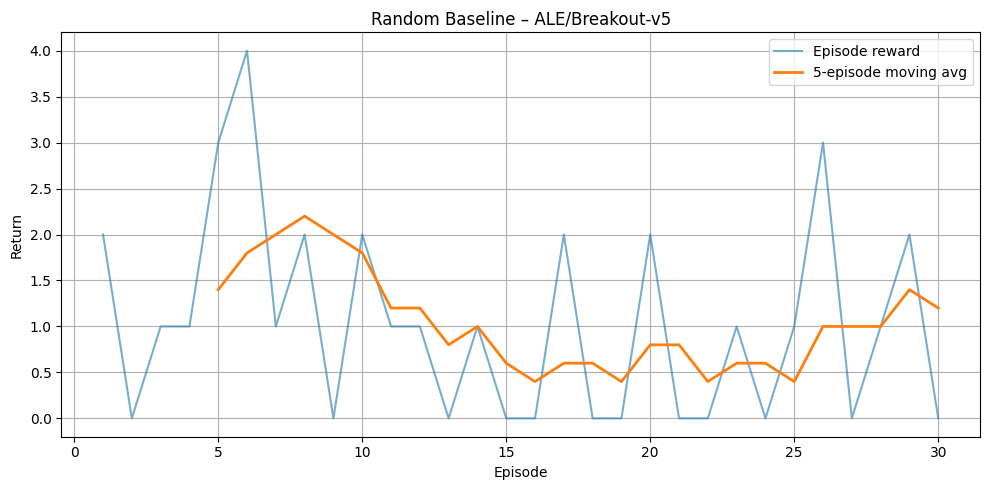

Saved plot to breakout_random_rewards.png


Breakout random episode reward: 1.0
Saved video to breakout_random.mp4


In [8]:
import gymnasium as gym
import ale_py
import numpy as np
import matplotlib.pyplot as plt
import imageio

gym.register_envs(ale_py)

print("Using random baseline on ALE/Breakout-v5")

def run_random_breakout(episodes=30, max_steps=10000):
    env = gym.make("ALE/Breakout-v5", repeat_action_probability=0.0)
    returns = []

    for ep in range(episodes):
        obs, info = env.reset()
        done = False
        total_reward = 0.0
        steps = 0

        while not done and steps < max_steps:
            action = env.action_space.sample()  # RANDOM ACTION
            obs, reward, terminated, truncated, info = env.step(action)
            total_reward += reward
            done = terminated or truncated
            steps += 1

        returns.append(total_reward)
        print(f"BREAKOUT | Episode {ep+1:3d} | Random Reward = {total_reward:5.1f}")

    env.close()
    return np.array(returns)


def plot_rewards_breakout(returns, title, png_name):
    episodes = np.arange(1, len(returns) + 1)

    plt.figure(figsize=(10, 5))
    plt.plot(episodes, returns, label="Episode reward", alpha=0.6)

    if len(returns) >= 5:
        window = 5
        moving = np.convolve(returns, np.ones(window) / window, mode="valid")
        plt.plot(episodes[window - 1:], moving, label=f"{window}-episode moving avg", linewidth=2)

    plt.xlabel("Episode")
    plt.ylabel("Return")
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig(png_name, dpi=150)
    plt.show()
    print(f"Saved plot to {png_name}")


def record_random_breakout_video(filename="breakout_random.mp4", max_steps=4000):
    env = gym.make("ALE/Breakout-v5", render_mode="rgb_array")
    obs, info = env.reset()
    done = False
    frames = []
    steps = 0
    total_reward = 0.0

    while not done and steps < max_steps:
        frame = env.render()
        frames.append(frame)
        action = env.action_space.sample()
        obs, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        done = terminated or truncated
        steps += 1

    env.close()
    imageio.mimsave(filename, frames, fps=30)
    print(f"Breakout random episode reward: {total_reward:.1f}")
    print(f"Saved video to {filename}")


# ==== RUN ====
breakout_returns = run_random_breakout(episodes=30)
plot_rewards_breakout(breakout_returns, "Random Baseline – ALE/Breakout-v5", "breakout_random_rewards.png")
record_random_breakout_video("breakout_random.mp4")


Using random baseline on ALE/SpaceInvaders-v5
SPACE INVADERS | Episode   1 | Random Reward =  35.0
SPACE INVADERS | Episode   2 | Random Reward = 230.0
SPACE INVADERS | Episode   3 | Random Reward = 180.0
SPACE INVADERS | Episode   4 | Random Reward = 135.0
SPACE INVADERS | Episode   5 | Random Reward = 240.0
SPACE INVADERS | Episode   6 | Random Reward =  35.0
SPACE INVADERS | Episode   7 | Random Reward = 180.0
SPACE INVADERS | Episode   8 | Random Reward = 190.0
SPACE INVADERS | Episode   9 | Random Reward =  35.0
SPACE INVADERS | Episode  10 | Random Reward = 105.0
SPACE INVADERS | Episode  11 | Random Reward = 105.0
SPACE INVADERS | Episode  12 | Random Reward =  55.0
SPACE INVADERS | Episode  13 | Random Reward = 120.0
SPACE INVADERS | Episode  14 | Random Reward = 135.0
SPACE INVADERS | Episode  15 | Random Reward =  50.0
SPACE INVADERS | Episode  16 | Random Reward = 155.0
SPACE INVADERS | Episode  17 | Random Reward =  35.0
SPACE INVADERS | Episode  18 | Random Reward = 105.0


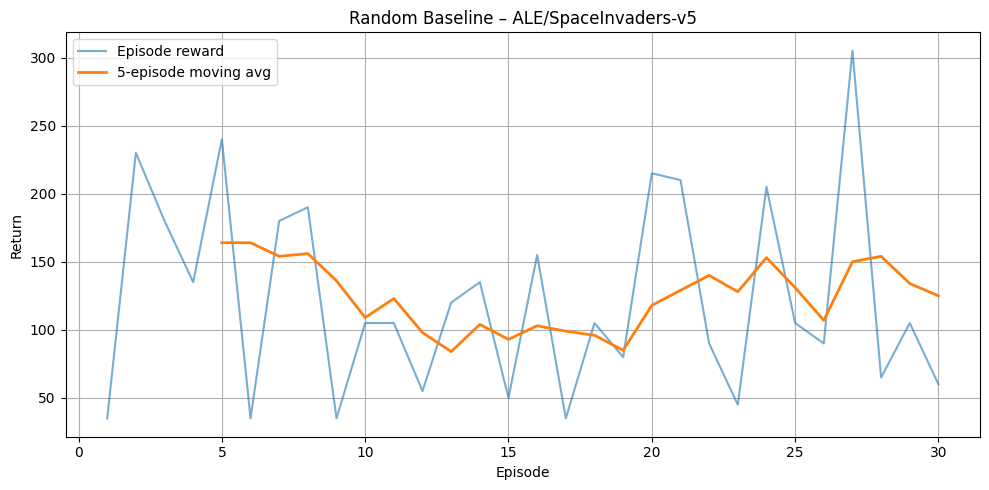

Saved plot to spaceinvaders_random_rewards.png


Space Invaders random episode reward: 65.0
Saved video to spaceinvaders_random.mp4


In [9]:
import gymnasium as gym
import ale_py
import numpy as np
import matplotlib.pyplot as plt
import imageio

gym.register_envs(ale_py)

print("Using random baseline on ALE/SpaceInvaders-v5")

def run_random_spaceinv(episodes=30, max_steps=10000):
    env = gym.make("ALE/SpaceInvaders-v5", repeat_action_probability=0.0)
    returns = []

    for ep in range(episodes):
        obs, info = env.reset()
        done = False
        total_reward = 0.0
        steps = 0

        while not done and steps < max_steps:
            action = env.action_space.sample()  # RANDOM ACTION
            obs, reward, terminated, truncated, info = env.step(action)
            total_reward += reward
            done = terminated or truncated
            steps += 1

        returns.append(total_reward)
        print(f"SPACE INVADERS | Episode {ep+1:3d} | Random Reward = {total_reward:5.1f}")

    env.close()
    return np.array(returns)


def plot_rewards_spaceinv(returns, title, png_name):
    episodes = np.arange(1, len(returns) + 1)

    plt.figure(figsize=(10, 5))
    plt.plot(episodes, returns, label="Episode reward", alpha=0.6)

    if len(returns) >= 5:
        window = 5
        moving = np.convolve(returns, np.ones(window) / window, mode="valid")
        plt.plot(episodes[window - 1:], moving, label=f"{window}-episode moving avg", linewidth=2)

    plt.xlabel("Episode")
    plt.ylabel("Return")
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig(png_name, dpi=150)
    plt.show()
    print(f"Saved plot to {png_name}")


def record_random_spaceinv_video(filename="spaceinvaders_random.mp4", max_steps=4000):
    env = gym.make("ALE/SpaceInvaders-v5", render_mode="rgb_array")
    obs, info = env.reset()
    done = False
    frames = []
    steps = 0
    total_reward = 0.0

    while not done and steps < max_steps:
        frame = env.render()
        frames.append(frame)
        action = env.action_space.sample()
        obs, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        done = terminated or truncated
        steps += 1

    env.close()
    imageio.mimsave(filename, frames, fps=30)
    print(f"Space Invaders random episode reward: {total_reward:.1f}")
    print(f"Saved video to {filename}")


# ==== RUN ====
si_returns = run_random_spaceinv(episodes=30)
plot_rewards_spaceinv(si_returns, "Random Baseline – ALE/SpaceInvaders-v5", "spaceinvaders_random_rewards.png")
record_random_spaceinv_video("spaceinvaders_random.mp4")
